# Description
The sinking of Titanic is one of the most notorioous shipwredcks in the history. In 1912 her voyage, The titanic sank after colliding with an iceberg. Killing 1502 out of 2224 passangers and crew.

Here we are provided with a dataset which contains data of passengers onboard Titanic. It includes information like there name, age,sex, whether they were with siblings or spouse, whether they were having parents or they were alone. Apart from personal we can have info abot the Passenger class in which they were traveling and also the embarking town.

We have data which shows how many passengers survived the disaster who all weren't lucky enough to make it. 

Using the given info we would try to build a ML model which on inputting passenger details can predict whther the passenger is likely to survive or not.

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Dataset
titanic=pd.read_csv('titanic.csv')

In [29]:
#to display complete data
pd.set_option('display.max_rows',None)

# Overview of the dataset

In [30]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We see the dataset has columns with mixed datatypes. Also there are missing values in some columns.

In [38]:
#Checking Null Values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

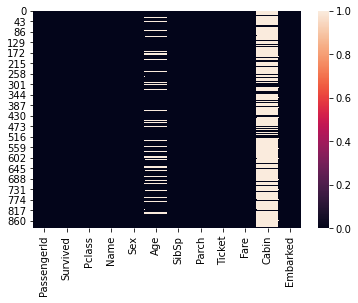

In [34]:
sns.heatmap(titanic.isnull())

We observe null values in Age, Cabin and Embarked columns.

# Analytical analysis of Dataset

In [184]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [185]:
titanic.shape

(891, 12)

We have two continuous values in the dataset i.e: Age and Fare. Rest Columns are categorical in nature.
    
    1. In the Age column we don't observe much abnormality. Not much difference is observed in the 75th percentile and Max value,thus absence of extreme outliers.
    Also. mean is slightly higher then the median value which denote a slightly right skewed data.
    
    2. In the Fare column we see a large difference between 75th percentile and max value. Shows outliers possibility. Mean is at higher side then median which shows left skewed data.

# Analysing Columns

Univariate Analysis of Categorical Columns

Survived (Target Variable)

In [39]:
#Checking Value Counts

titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

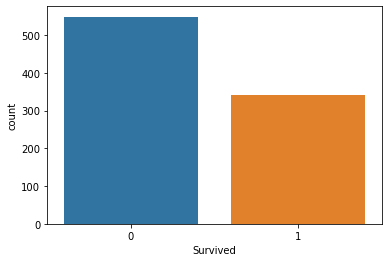

In [40]:
sns.countplot(x='Survived',data=titanic)

Out of 891 passengers onboard, 549 lost their lives while 342 survived.

In [4]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

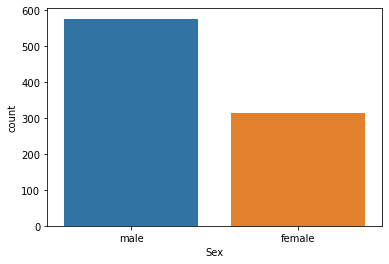

In [41]:
sns.countplot(x='Sex',data=titanic)

There were 577 Male passengers and 314 Female passengers onboard.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

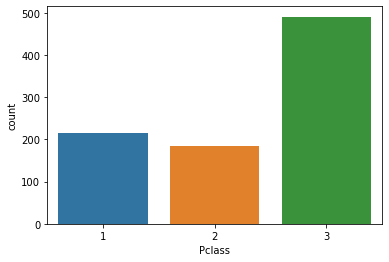

In [42]:
sns.countplot(x='Pclass',data=titanic)

In [5]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

As we see,Maximum passengers were traveling in the 3rd class which is 491 while the 2nd class has the least reservations.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

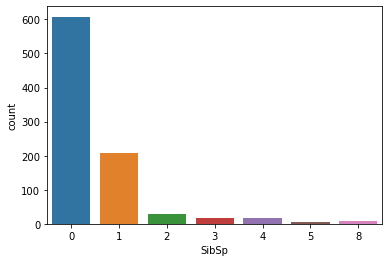

In [43]:
sns.countplot(x='SibSp',data=titanic)

In [7]:
titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Above graph and count shows that maximum number of passengers were traveling without Siblings or Spouse. While there were 209 passenger who were with a sibling or spouse.

<AxesSubplot:xlabel='Parch', ylabel='count'>

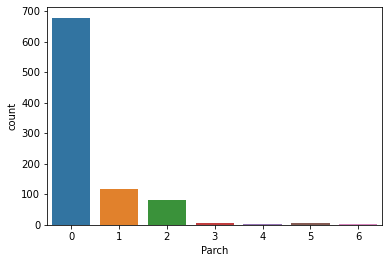

In [44]:
sns.countplot(x='Parch',data=titanic)

In [8]:
titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

678 passengers were without parents or children. 118 were either with 1 parent or a child.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

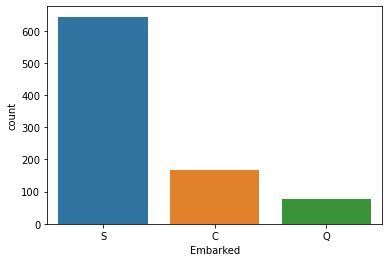

In [45]:
sns.countplot(x='Embarked',data=titanic)

In [9]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S, Q, C shows the embarking towns from where the passengers started there journey. Maximum passengers boarded the liner from Southhampton followed by Cherbourg and Queenstown.

# Bivariate Analysis of Categorical Columns

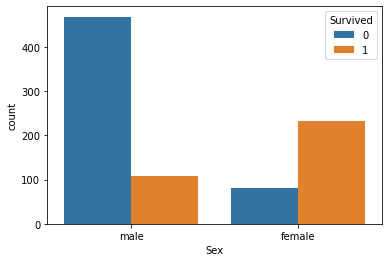

<Figure size 720x576 with 0 Axes>

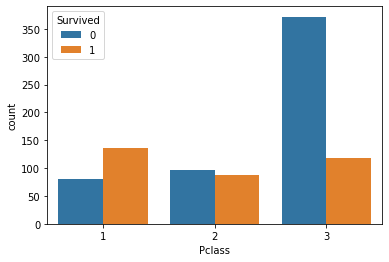

<Figure size 720x576 with 0 Axes>

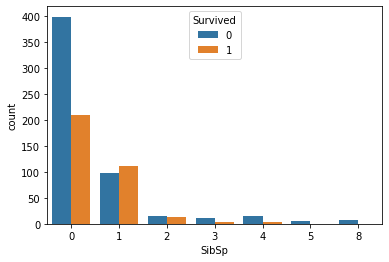

<Figure size 720x576 with 0 Axes>

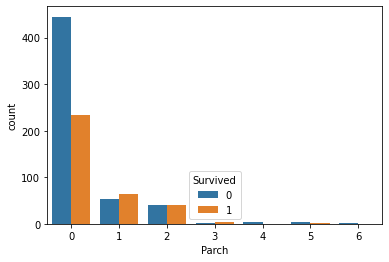

<Figure size 720x576 with 0 Axes>

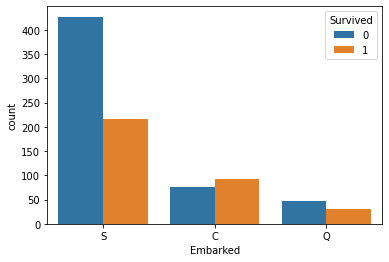

<Figure size 720x576 with 0 Axes>

In [46]:
col=['Sex','Pclass','SibSp','Parch','Embarked']
for i in col:
    sns.countplot(x=i,hue='Survived',data=titanic)
    plt.figure(figsize=(10,8))
    plt.show()

In [47]:
pd.crosstab(titanic['Sex'],titanic["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [48]:
pd.crosstab(titanic['Pclass'],titanic["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [49]:
pd.crosstab(titanic['SibSp'],titanic["Survived"])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [50]:
pd.crosstab(titanic['Parch'],titanic["Survived"])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [51]:
pd.crosstab(titanic['Embarked'],titanic["Survived"])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


Using countplot and crosstabs for observing relation of various conditions with passengers we have some interesting observations:
    
    1. Out of total population, mortality rate of males are higher than that of females. Out of 577 males 468 weren't lucky enough to survive. Females show higher possiblity of survival.
    
    2. In terms of passenger class, we observe highest death rate in 3rd class followed by 2nd and then 1st. As the maximum reservations were in 3rd class higher death rate is obvious. As the 2nd class was having less reservations then 1st class but the number of passengers died in this class is more then that of 1st class, this denotes that the mortalitly rate of 2nd class is higher and the passenger traveling in the second class is less ikely to survive.
    
    3. Pepople traveling alone were more likely NOT to Survive. Traveling with spouse or sibling ranging between 1-4 shows chances of survival while having more then 4 siblings onboard proves fatal. Same is observed with passnegers traveling with 1-2 Parents or children. 
    
    4. People boarding from Southhampton are less likely to survive. Almost 66.3% of passengers who boarded from this town died. Mortality rate of Queenstown and Cherbough is 61% and 44% respectively.

# Analysing Continuous Value Columns

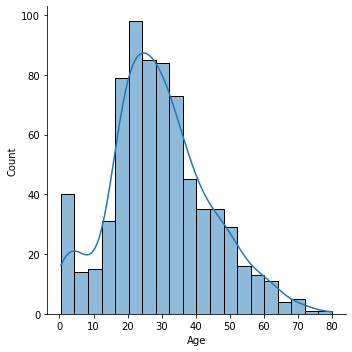

In [52]:
sns.displot(titanic['Age'],kde=True,bins=20)

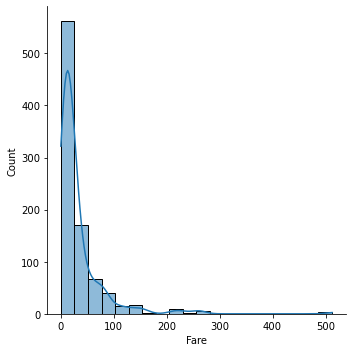

In [53]:
sns.displot(titanic['Fare'],kde=True,bins=20)

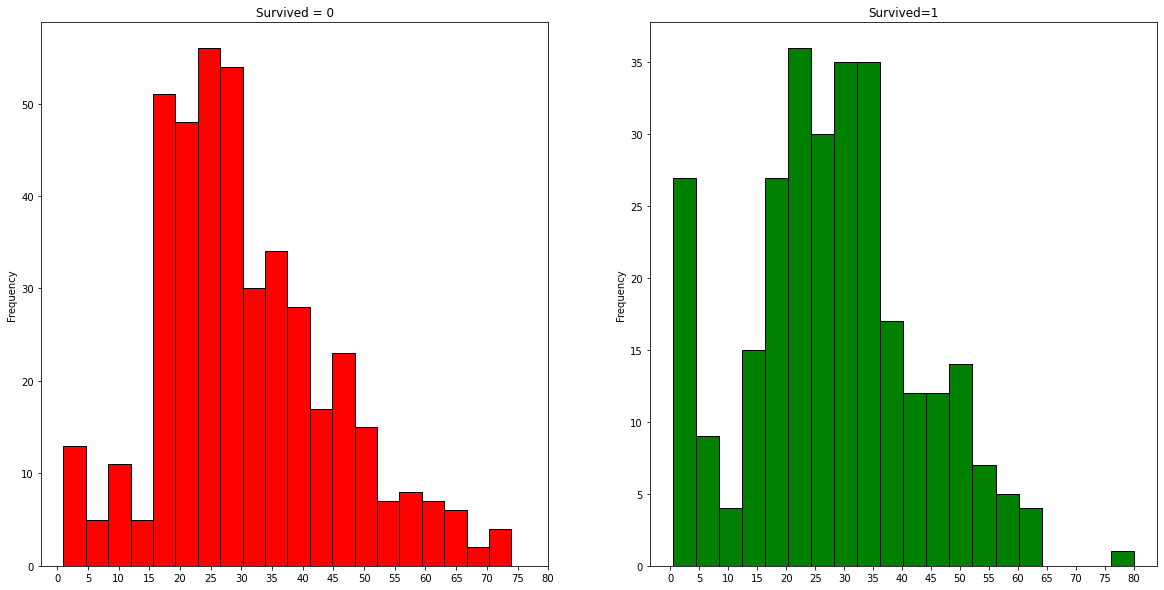

In [186]:
f,ax = plt.subplots(1,2, figsize=(20,10))

titanic.loc[titanic['Survived'] ==0]['Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
ax1 = list(range(0, 85, 5))
ax[0].set_xticks(ax1)

titanic[titanic['Survived']==1]['Age'].plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

1. Distribution plot of Age column shows normal distribution while that of Fare shows left skewed data.

2. Plotting the histogram of Age with Survived passengers we observe
  
    1. Death rate is high between the age of 15 to 40 years having 15 to 30 as highest.
    2. Survival rate of children age<5years(Toddlers) is high. We also observed high female survival rate above. This might be because of the Children and Women first policy.
    3. Elderly citizen of 80 years was also saved.

In [187]:
#Replacing null values in Age with Median as it is more robust to outliers.

titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

In [188]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [189]:
titanic['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [190]:
titanic['Embarked'].mode()

0    S
dtype: object

In [10]:
# Replacing missing values in Embarked with most frequently occuring value.
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Encoding

In [193]:
# Using Ordinal Encoder for changing string values to numeric form
from sklearn.preprocessing import OrdinalEncoder

In [194]:
OE=OrdinalEncoder()
collist=['Sex','Embarked']
for i in collist:
    titanic[i]=OE.fit_transform(titanic[i].values.reshape(-1,1))

In [195]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.00,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.00,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.00,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.00,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.00,0,0,373450,8.0500,NaN,2.0
5,6,0,3,"Moran, Mr. James",1.0,28.00,0,0,330877,8.4583,NaN,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",1.0,54.00,0,0,17463,51.8625,E46,2.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1.0,2.00,3,1,349909,21.0750,NaN,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.0,27.00,0,2,347742,11.1333,NaN,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0.0,14.00,1,0,237736,30.0708,NaN,0.0


# Checking Correlation

In [196]:
titanic_cor=titanic.corr()

In [197]:
titanic_cor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

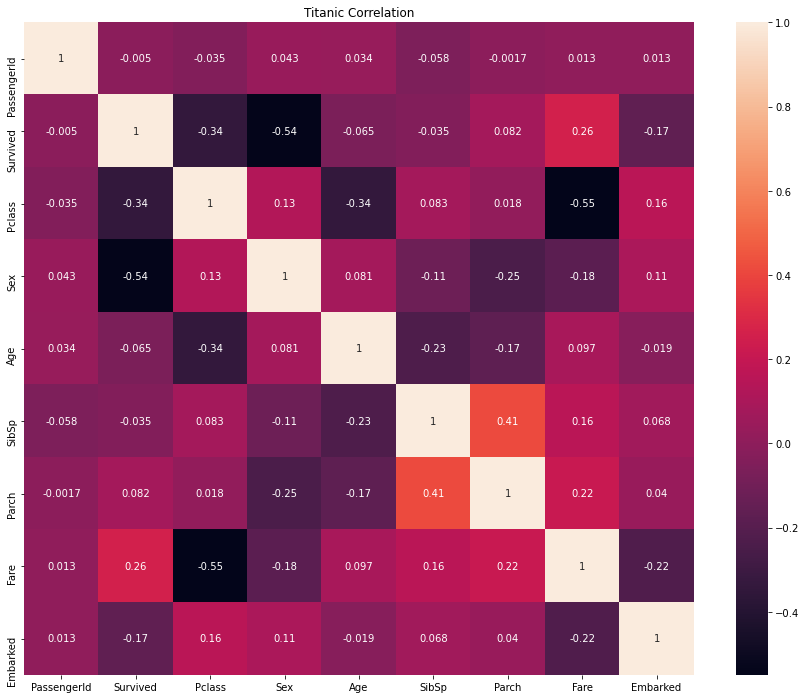

In [198]:
plt.figure(figsize=(15,12))
plt.title('Titanic Correlation')
sns.heatmap(titanic_cor,annot=True)
plt.show

We observe:
    
    1. Negative correlation between Sex and Survived. This is because the count of male passengers were high and out of that maximum died.
    2. Negative correlation with Pclass. This is obvious because maximum were in 3rd class and mortality is also maximum. So as the Pclass goes down (Higher in number i.e 3rd) mortality rate increases.
    3. Fare has a positive correlation because higher fare denote higher Pcalss and higher Pclass shows less mortality rate.

# Checking Outliers

<AxesSubplot:xlabel='Fare'>

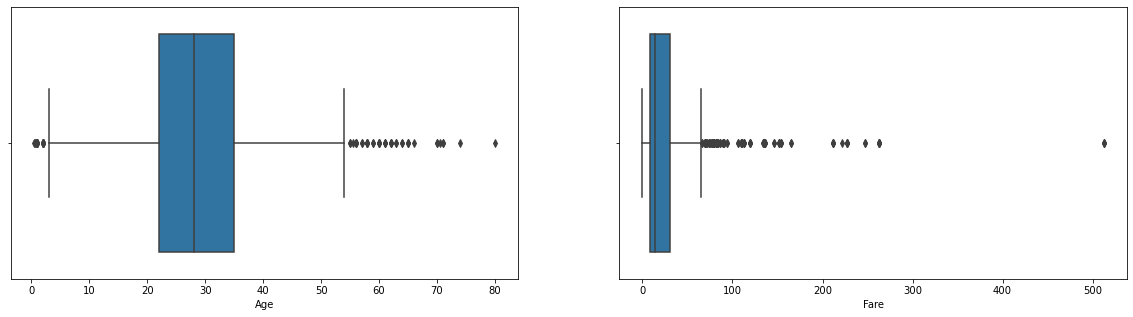

In [199]:
fig, ax =plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(titanic['Age'], ax=ax[0])
sns.boxplot(titanic['Fare'], ax=ax[1])

# Removing Outliers

In [200]:
# As the nominal range for fare is till 300 we check for entries showing higher fare
print(np.where(titanic["Fare"]>300))

(array([258, 679, 737], dtype=int64),)


In [201]:
# There are just 3 entries which shows Higher fare rate and can be removed for normal distribution.
titanic=titanic[titanic['Fare']<300]

In [202]:
titanic.shape

(888, 12)

# Checking Skewness

In [203]:
titanic.skew()

PassengerId    0.002394
Survived       0.487605
Pclass        -0.640238
Sex           -0.618628
Age            0.514256
SibSp          3.688909
Parch          2.748427
Fare           3.187877
Embarked      -1.281891
dtype: float64

with threshold values as -/+ 0.5 we observe some skewness in fare columns.

Treating Skewness

In [204]:
from sklearn.preprocessing import power_transform
titanic['Fare']=power_transform(titanic['Fare'].values.reshape(-1,1))
titanic.skew()

PassengerId    0.002394
Survived       0.487605
Pclass        -0.640238
Sex           -0.618628
Age            0.514256
SibSp          3.688909
Parch          2.748427
Fare          -0.029667
Embarked      -1.281891
dtype: float64

# Splitting Input and Target Data

In [205]:
x=titanic.drop(['PassengerId','Survived','Cabin','Ticket','Name'],axis=1)
y=titanic['Survived']
print(x.head())
print(y.head())
print(x.shape)
print(y.shape)

   Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0       3  1.0  22.0      1      0 -0.882042       2.0
1       1  0.0  38.0      1      0  1.371501       0.0
2       3  0.0  26.0      0      0 -0.793208       2.0
3       1  0.0  35.0      1      0  1.093274       2.0
4       3  1.0  35.0      0      0 -0.777557       2.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
(888, 7)
(888,)


# Scaling Data

We have maximum columns as categorical in nature which ranges from 0 to 8 while the Numerical columns like Fare ranges between 0 to 300. To get a normal distribution and better training we scale our Data between 0 t0 1 using MinMax Scaler. 

In [206]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [207]:
x_new=mms.fit_transform(x)

In [208]:
x=pd.DataFrame(x_new,columns=x.columns)

In [209]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.432865,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.806592,0.0
2,1.0,0.0,0.321438,0.000,0.000000,0.447597,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.760450,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.450193,1.0
5,1.0,1.0,0.346569,0.000,0.000000,0.458409,0.5
6,0.0,1.0,0.673285,0.000,0.000000,0.756718,1.0
7,1.0,1.0,0.019854,0.375,0.166667,0.610584,1.0
8,1.0,0.0,0.334004,0.000,0.333333,0.504226,1.0
9,0.5,0.0,0.170646,0.125,0.000000,0.669033,0.0


# Finding the Best Random State

In [210]:
# Importing Classification Algorithms
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [211]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lrpred=lr.predict(x_test)
    acc=accuracy_score(y_test,lrpred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best Accuracy Score is :  0.8576779026217228  when Random state is :  5


We have the best accuracy at 85% at Random State 5. We will use these values for our training.

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)

# Building Model with Various Algorithms

We use for loop to test various algorithms to get the best result.

In [127]:
# Defining Model List
model_list=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GaussianNB()]

In [128]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train,y_train)
    model_pred_train=model.predict(x_train)
    model_pred=model.predict(x_test)
    print('Training Accuracy for the model ',m,' is: ',accuracy_score(y_train,model_pred_train))
    print('Testing Accuracy for the model ',m,' is: ',accuracy_score(y_test,model_pred))
    print('\n')
    

Training Accuracy for the model  LogisticRegression()  is:  0.7761674718196457
Testing Accuracy for the model  LogisticRegression()  is:  0.8576779026217228


Training Accuracy for the model  SVC()  is:  0.7954911433172303
Testing Accuracy for the model  SVC()  is:  0.8576779026217228


Training Accuracy for the model  DecisionTreeClassifier()  is:  0.9806763285024155
Testing Accuracy for the model  DecisionTreeClassifier()  is:  0.8127340823970037


Training Accuracy for the model  KNeighborsClassifier()  is:  0.8389694041867954
Testing Accuracy for the model  KNeighborsClassifier()  is:  0.8614232209737828


Training Accuracy for the model  RandomForestClassifier()  is:  0.9806763285024155
Testing Accuracy for the model  RandomForestClassifier()  is:  0.850187265917603


Training Accuracy for the model  GaussianNB()  is:  0.7455716586151369
Testing Accuracy for the model  GaussianNB()  is:  0.8202247191011236




# Cross Validating the Models

As we have the accuracy score of various algorithms, we will cross validate each to check for Overfitting or Underfitting at different CV values.

In [122]:
from sklearn.model_selection import cross_val_score

In [213]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
testing_accu=accuracy_score(y_test,lr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(LogisticRegression(),x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 78.04054054054053 and the accuracy for testing is 85.76779026217228 


At crossfold 3 the CV score of is 78.94144144144143 and the accuracy for testing is 85.76779026217228 


At crossfold 4 the CV score of is 79.3918918918919 and the accuracy for testing is 85.76779026217228 


At crossfold 5 the CV score of is 78.94115406589222 and the accuracy for testing is 85.76779026217228 


At crossfold 6 the CV score of is 78.82882882882883 and the accuracy for testing is 85.76779026217228 


At crossfold 7 the CV score of is 79.61951184673343 and the accuracy for testing is 85.76779026217228 


At crossfold 8 the CV score of is 79.72972972972974 and the accuracy for testing is 85.76779026217228 


At crossfold 9 the CV score of is 79.39485558533177 and the accuracy for testing is 85.76779026217228 




In [214]:
# SVC
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
testing_accu=accuracy_score(y_test,svc_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 80.2927927927928 and the accuracy for testing is 85.76779026217228 


At crossfold 3 the CV score of is 81.1936936936937 and the accuracy for testing is 85.76779026217228 


At crossfold 4 the CV score of is 80.96846846846847 and the accuracy for testing is 85.76779026217228 


At crossfold 5 the CV score of is 80.96806957404941 and the accuracy for testing is 85.76779026217228 


At crossfold 6 the CV score of is 81.41891891891892 and the accuracy for testing is 85.76779026217228 


At crossfold 7 the CV score of is 81.08182905708216 and the accuracy for testing is 85.76779026217228 


At crossfold 8 the CV score of is 81.30630630630631 and the accuracy for testing is 85.76779026217228 


At crossfold 9 the CV score of is 80.74509264985457 and the accuracy for testing is 85.76779026217228 




In [215]:
# DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
testing_accu=accuracy_score(y_test,dtc_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 76.57657657657657 and the accuracy for testing is 81.27340823970037 


At crossfold 3 the CV score of is 77.13963963963964 and the accuracy for testing is 81.27340823970037 


At crossfold 4 the CV score of is 76.91441441441442 and the accuracy for testing is 81.27340823970037 


At crossfold 5 the CV score of is 79.05160921729194 and the accuracy for testing is 81.27340823970037 


At crossfold 6 the CV score of is 77.25225225225225 and the accuracy for testing is 81.27340823970037 


At crossfold 7 the CV score of is 78.38395200599925 and the accuracy for testing is 81.27340823970037 


At crossfold 8 the CV score of is 78.94144144144144 and the accuracy for testing is 81.27340823970037 


At crossfold 9 the CV score of is 78.38475457523076 and the accuracy for testing is 81.27340823970037 




In [218]:
# KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
testing_accu=accuracy_score(y_test,knn_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 80.2927927927928 and the accuracy for testing is 86.14232209737828 


At crossfold 3 the CV score of is 80.51801801801803 and the accuracy for testing is 86.14232209737828 


At crossfold 4 the CV score of is 81.75675675675676 and the accuracy for testing is 86.14232209737828 


At crossfold 5 the CV score of is 81.64603567574432 and the accuracy for testing is 86.14232209737828 


At crossfold 6 the CV score of is 80.96846846846847 and the accuracy for testing is 86.14232209737828 


At crossfold 7 the CV score of is 81.30680093559734 and the accuracy for testing is 86.14232209737828 


At crossfold 8 the CV score of is 81.30630630630631 and the accuracy for testing is 86.14232209737828 


At crossfold 9 the CV score of is 81.53301724730296 and the accuracy for testing is 86.14232209737828 




In [220]:
# RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
testing_accu=accuracy_score(y_test,rfc_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 78.94144144144144 and the accuracy for testing is 86.51685393258427 


At crossfold 3 the CV score of is 79.61711711711712 and the accuracy for testing is 86.51685393258427 


At crossfold 4 the CV score of is 80.40540540540542 and the accuracy for testing is 86.51685393258427 


At crossfold 5 the CV score of is 81.64286167714087 and the accuracy for testing is 86.51685393258427 


At crossfold 6 the CV score of is 81.75675675675677 and the accuracy for testing is 86.51685393258427 


At crossfold 7 the CV score of is 81.87369435963362 and the accuracy for testing is 86.51685393258427 


At crossfold 8 the CV score of is 82.0945945945946 and the accuracy for testing is 86.51685393258427 


At crossfold 9 the CV score of is 81.19631691060262 and the accuracy for testing is 86.51685393258427 




In [219]:
# GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)
testing_accu=accuracy_score(y_test,gnb_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(gnb,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 77.13963963963964 and the accuracy for testing is 82.02247191011236 


At crossfold 3 the CV score of is 76.80180180180182 and the accuracy for testing is 82.02247191011236 


At crossfold 4 the CV score of is 76.6891891891892 and the accuracy for testing is 82.02247191011236 


At crossfold 5 the CV score of is 76.47114835269473 and the accuracy for testing is 82.02247191011236 


At crossfold 6 the CV score of is 76.12612612612612 and the accuracy for testing is 82.02247191011236 


At crossfold 7 the CV score of is 76.244040923456 and the accuracy for testing is 82.02247191011236 


At crossfold 8 the CV score of is 75.78828828828829 and the accuracy for testing is 82.02247191011236 


At crossfold 9 the CV score of is 76.1389404246547 and the accuracy for testing is 82.02247191011236 




As observed above, minimum difference between the Accuracy Score and Cross Validation Score is in Decision Tree Classifier at CV=5. Also there isnt much difference in the Cv score at other cv values. Hence, this model looks suitable for the prediction. We move ahead with Hyper Tuning to further increase the accuracy if possible.

# Hyper Paramter Tuning

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
# for Decision Tree Classifier


gr_param={'max_depth' : np.arange(2,15),'criterion':['gini','entropy']}
gcv= GridSearchCV(estimator=dtc,param_grid=gr_param,scoring='accuracy',cv=5)

In [224]:
# Getting Best Parameters

gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [225]:
# Getting Accuracy Score

gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.8726591760299626

We have found that using the criterion as Entropy and setting max_depth=6 we can increase the accuracy further. Thus we will build our model with the Decision Tree Classifier applying given parameters and cross validate.

In [241]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6)
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
testing_accu=accuracy_score(y_test,dtc_pred)*100
print(testing_accu)
print('\n')

testing_accu=accuracy_score(y_test,dtc_pred)*100
cv_score=cross_val_score(dtc,x,y,cv=8)
cv_mean=cv_score.mean()*100
print(f'CV score  is {cv_mean} and the accuracy for testing is {testing_accu} ')
print('\n')

87.26591760299625


CV score  is 82.65765765765765 and the accuracy for testing is 87.26591760299625 




Although the accuracy is increased, we observe overfitting in the model as compared to the model with default parameters. Thus it is better to build the model with defaults parameters. 

In [242]:
#Building model with default parameters


dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
testing_accu=accuracy_score(y_test,dtc_pred)*100

cv_score=cross_val_score(dtc,x,y,cv=5)
cv_mean=cv_score.mean()*100
print(f'CV score  is {cv_mean} and the accuracy for testing is {testing_accu} ')
print('\n')

CV score  is 79.27823271757761 and the accuracy for testing is 81.27340823970037 




# Plotting the Auc Roc Curve

In [227]:
from sklearn.metrics import roc_curve,roc_auc_score

In [243]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

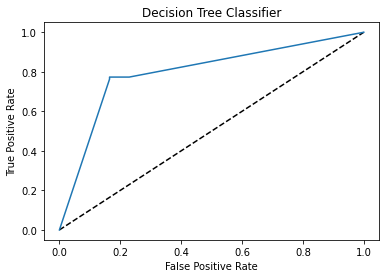

In [244]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.show()

In [245]:
auc_score=roc_auc_score(y_test,y_pred_prob)*100
auc_score

79.60582171012736

# Saving the model

In [247]:
import pickle
filename='titanic.pkl'
pickle.dump(dtc,open(filename,'wb'))

# Conclusion

In [248]:
load_model=pickle.load(open('titanic.pkl','rb'))

In [251]:
result=load_model.score(x_test,y_test)
print(result)

0.8127340823970037


In [252]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],dtc_pred[:]],index=['Predicted','Original'])

In [253]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
Predicted,0,1,0,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
Original,0,1,0,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
